In [1]:
import time
import pandas as pd 
from skimage.io import imread
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import random
import pandas as pd
import sys

start=time.time()
origin_path = './pickles/uav_val_sfcn.pickle'
df = pd.read_pickle(origin_path)
print("time : ", time.time() - start)


time :  49.01942229270935


In [2]:
print(df.columns)

Index(['id', 'superpixel_segment', 'G', 'feature', 'edges', 'label_gt',
       'superpixel_num'],
      dtype='object')


In [3]:
#https://stackoverflow.com/questions/56650201/how-to-convert-35-classes-of-cityscapes-dataset-to-19-classes
import numpy as np
label_list = []
s_num_list = []    
for idx, row in df.iterrows():
    s_num = row['superpixel_segment']
    _, count = np.unique(s_num, return_counts=True)
    s_num_list.append(count)
    for label in row['label_gt']: # for uav
        label_list.append(label)

In [4]:
set_label = set(label_list)
set_label

{0, 1, 2, 3, 4, 5, 6, 7}

In [5]:
df['id'][0]

'../data/uavid/uavid_val/seq20/Images/000900.png'

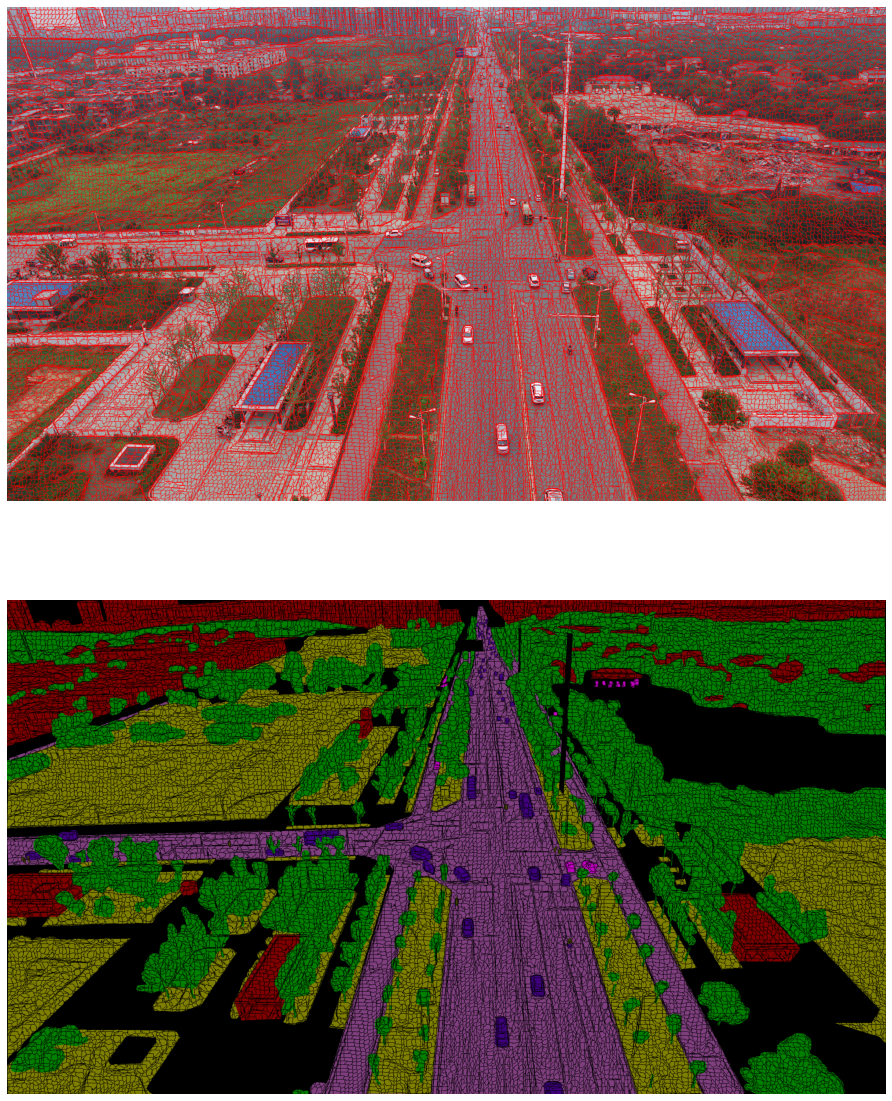

In [6]:
import matplotlib.pyplot as plt
import os
import os
import glob
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread
import networkx as nx

fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


idx = random.randint(0,len(df))
image_path = df['id'][idx].replace('../','')

gt_path = image_path.replace("Images",'Labels')
image = imread(image_path)
gt = imread(gt_path)

segments = df['superpixel_segment'][idx]
                
ax1.imshow(mark_boundaries(image, segments,mode = 'thick',color =(1,0,0)))
ax2.imshow(mark_boundaries(gt, segments,mode = 'thick',color =(0,0,0)))

ax1.axis("off")
ax2.axis('off')

plt.show()

In [7]:
import random

choice = df.iloc[idx]
rgb = np.array(choice['feature'])
rgb = rgb[:][:,:3]
label_gt = np.array(choice['label_gt'])
color_map = []
for label in label_gt :
    if label == 0 :
        color_map.append('black') #ok
    elif label == 1 :
        color_map.append('red') #ok
    elif label == 2 :
        # color_map.append('gray')
        color_map.append('#804080')
    elif label == 3 :
        color_map.append('#C933C9') 
    elif label == 4 :
        color_map.append('green') #ok
    elif label == 5 :
        color_map.append('yellow') #ok
    elif label == 6 :
        # color_map.append('blue')
        color_map.append('#404000')
    elif label == 7 :
        color_map.append('blue')

spixel = choice['superpixel_segment']
rgb_dict = dict(enumerate(rgb))
new_array = np.zeros((spixel.shape[0], spixel.shape[1],3), dtype=object)
for i in range(spixel.shape[0]):
    for j in range(spixel.shape[1]) :
        new_array[i][j] = rgb_dict[spixel[i][j]].astype(float)
new_array = new_array.astype(float)/255
img_origin = imread(image_path)
gt_origin = imread(image_path.replace("Images","Labels"))

397 1795


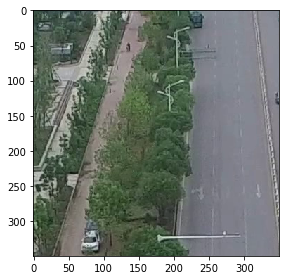

In [8]:
from skimage.io import imshow

w = 350
h = 350
x = random.randrange(w, 2100-w)
y = random.randrange(h, 3800-h)
print(x, y)
img = img_origin[x:x+w, y:y+h,:]
gt = gt_origin[x:x+w, y:y+h,:]
segments = spixel[x:x+w, y:y+h]
rgb_seg = new_array[x:x+w, y:y+h]
segments_ids = np.unique(segments)

# # # # centers
centers = np.array([np.mean(np.nonzero(segments==i),axis=1) for i in segments_ids])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(segments_ids)
label_dict = dict(zip(list(segments_ids),list(labels)))
revers_label = {v:k for k,v in label_dict.items()}
node_color = dict()
for i in range(len(segments_ids)):
    node_color[i] = rgb_dict[revers_label[i]]/255
cmaps = pd.Series(node_color)
label_gt_node = dict()
for i in range(len(segments_ids)):
    label_gt_node[i] = color_map[revers_label[i]]
gt_cmaps = pd.Series(label_gt_node)
new_seg = np.vectorize(label_dict.get)(segments)  # don't touch
imshow(img)

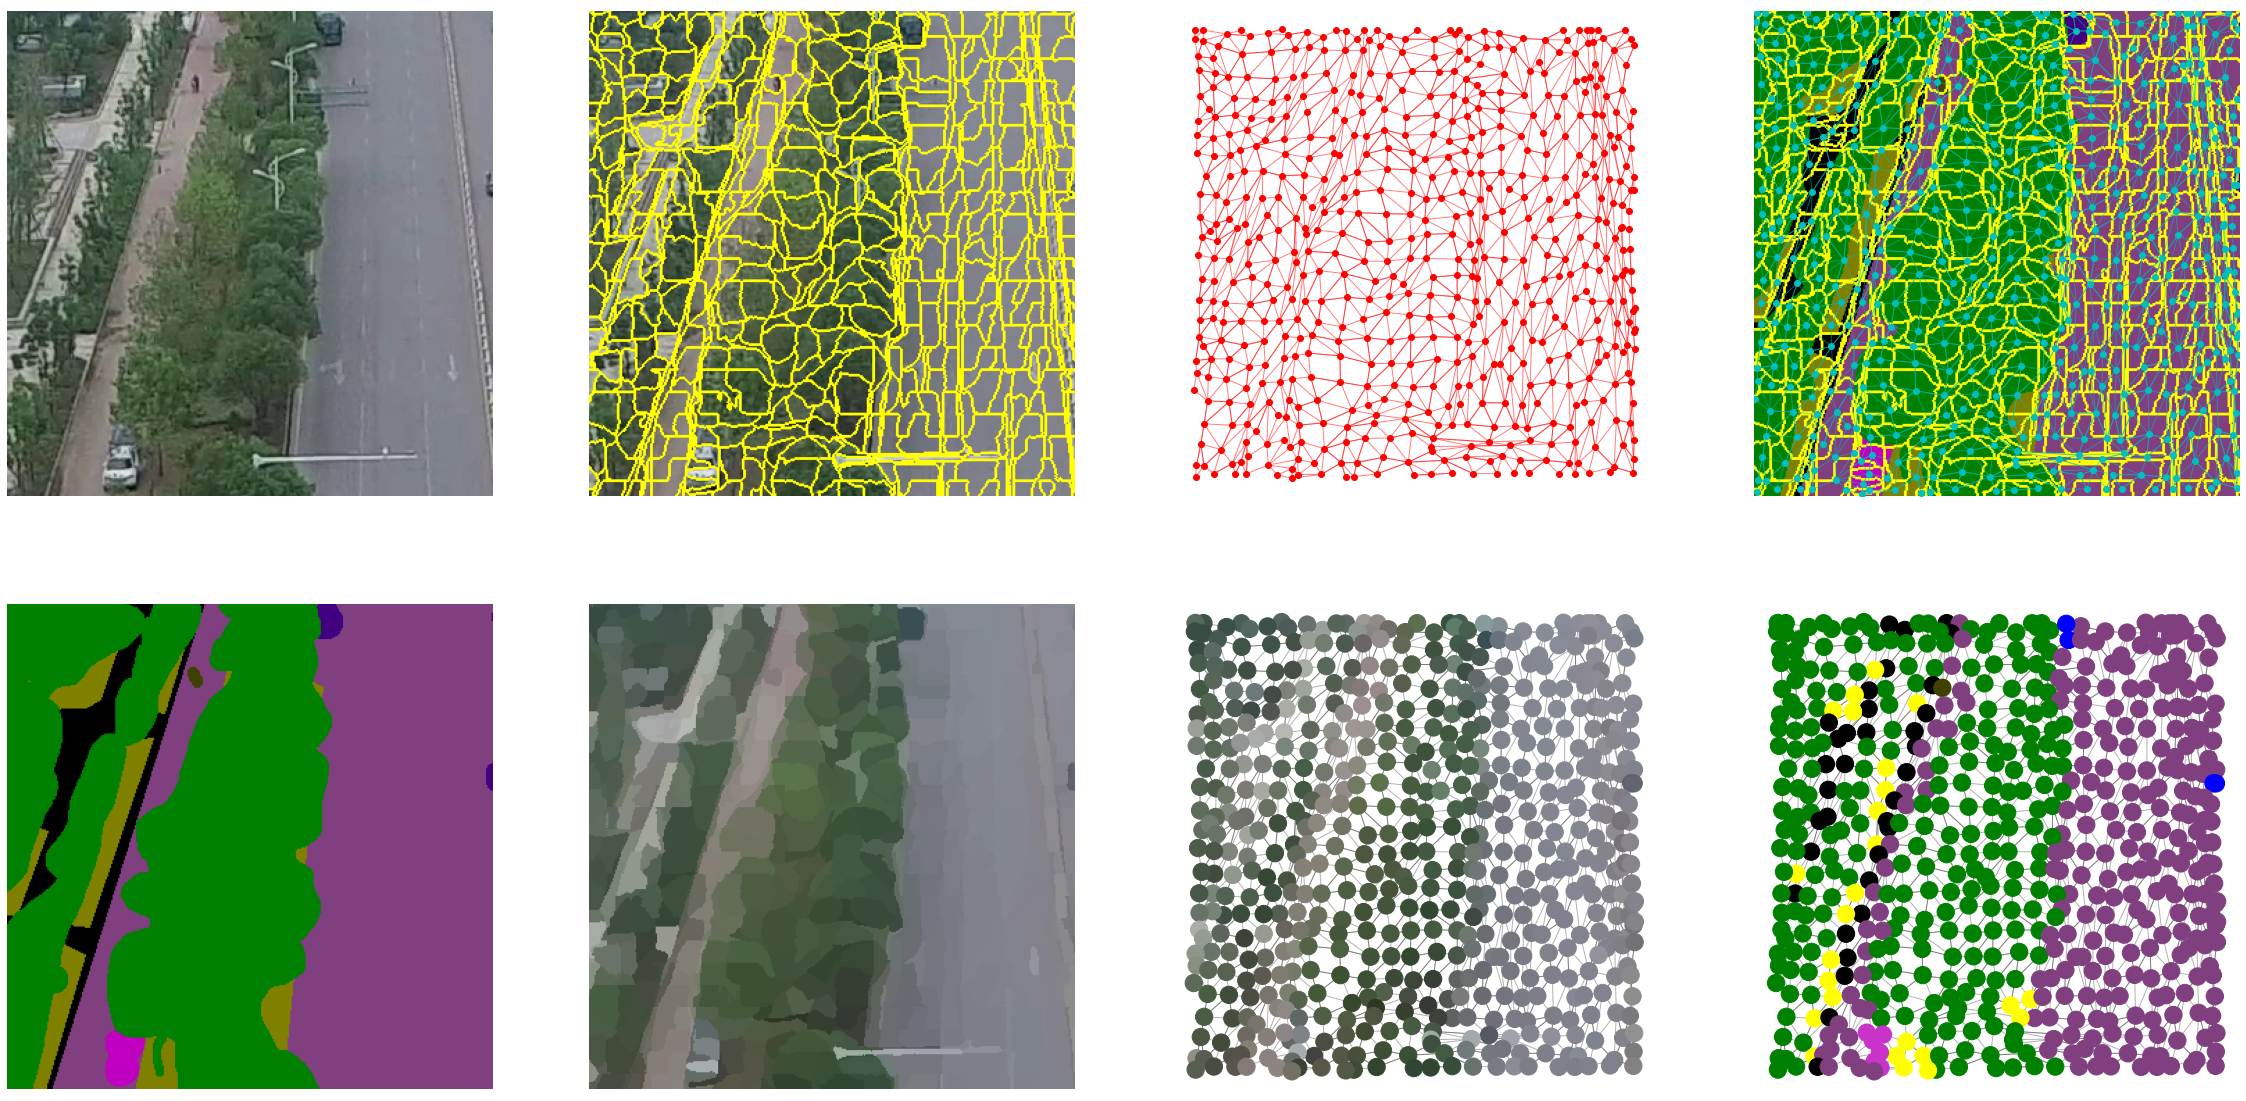

In [9]:
fig = plt.figure(figsize=(40,20))
row = 2
col = 4

ax0 = fig.add_subplot(row, col, 1)
ax1 = fig.add_subplot(row, col, 2)
ax2 = fig.add_subplot(row, col, 3)
ax3 = fig.add_subplot(row, col, 4)
ax4 = fig.add_subplot(row, col, 5)
ax5 = fig.add_subplot(row, col, 6)
ax6 = fig.add_subplot(row, col, 7)
ax7 = fig.add_subplot(row, col, 8)
ax0.imshow(img, cmap="gray")
ax1.imshow(mark_boundaries(img, segments), cmap="gray")
# ax2.imshow(mark_boundaries(img, segments), cmap="gray")
ax3.imshow(mark_boundaries(gt, segments), cmap="gray")
ax4.imshow(gt)
ax5.imshow(rgb_seg)

vs_right = np.vstack([new_seg[:,:-1].ravel(), new_seg[:,1:].ravel()])
vs_below = np.vstack([new_seg[:-1,:].ravel(), new_seg[1:,:].ravel()])
bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)
ax2.scatter(centers[:,1],centers[:,0], c='r')
ax3.scatter(centers[:,1],centers[:,0], c='c')


for i in range(bneighbors.shape[1]):

    y0,x0 = centers[bneighbors[0,i]]
    y1,x1 = centers[bneighbors[1,i]]
    
    l = Line2D([x0,x1],[y0,y1], c="r", alpha=0.5,linewidth =1)
    l2 = Line2D([x0,x1],[y0,y1], c="c", alpha=0.5,linewidth =1)
    l3 = Line2D([x0,x1],[y0,y1], c="k", alpha=0.3,linewidth =1)
    l4 = Line2D([x0,x1],[y0,y1], c="k", alpha=0.3,linewidth =1)
    ax2.add_line(l)
    ax3.add_line(l2)
    ax6.add_line(l3)
    ax7.add_line(l4)
ax6.scatter(centers[:,1],centers[:,0], c=cmaps, s= 300, alpha=1, zorder=502)    
ax7.scatter(centers[:,1],centers[:,0], c=gt_cmaps, s= 300, alpha=1, zorder=502)    
ax0.axis('off');ax1.axis('off');ax2.axis('off');ax3.axis('off');ax4.axis('off');ax5.axis('off');ax6.axis('off');ax7.axis('off')
ax6.invert_yaxis();ax7.invert_yaxis()
ax2.invert_yaxis()


plt.show()
# plt.savefig('superpixel_graph.png',bbox_inches="tight")